# 导入包

In [1]:
#
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


# 数据探索
## 训练集

### 数据初步观察与清洗

In [3]:
train_data=pd.read_csv("train.csv",parse_dates = [2],low_memory = False)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

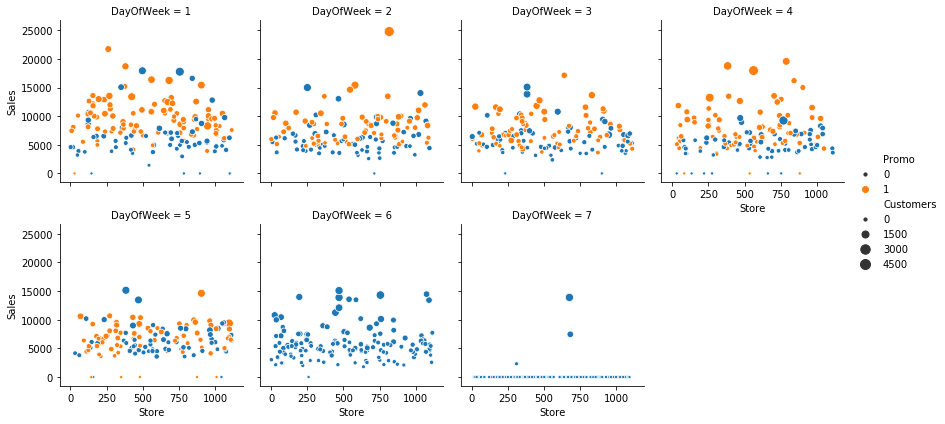

In [5]:
sns.relplot(x="Store", y="Sales", hue="Promo",size="Customers",col="DayOfWeek",sizes=(10,100),col_wrap=4,height=3,data=train_data.sample(frac=0.001,random_state=1))

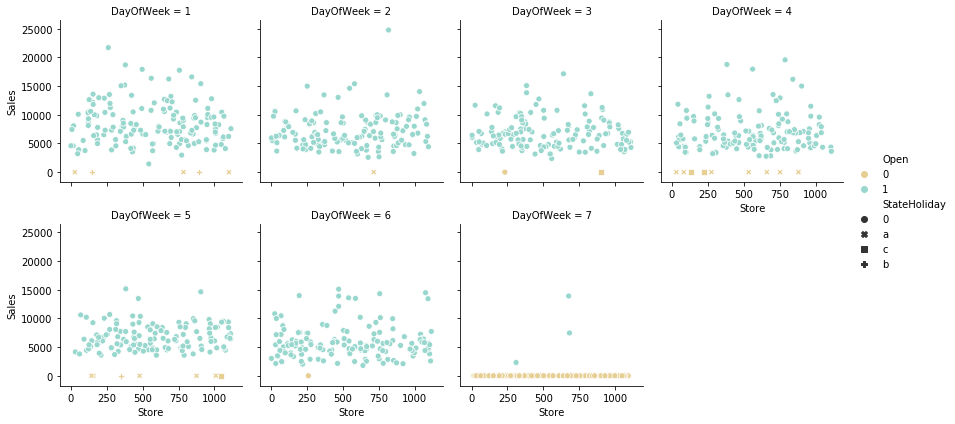

In [6]:
sns.relplot(x="Store", y="Sales", hue="Open",style="StateHoliday",col="DayOfWeek", palette="BrBG",col_wrap=4,height=3,data=train_data.sample(frac=0.001,random_state=1))

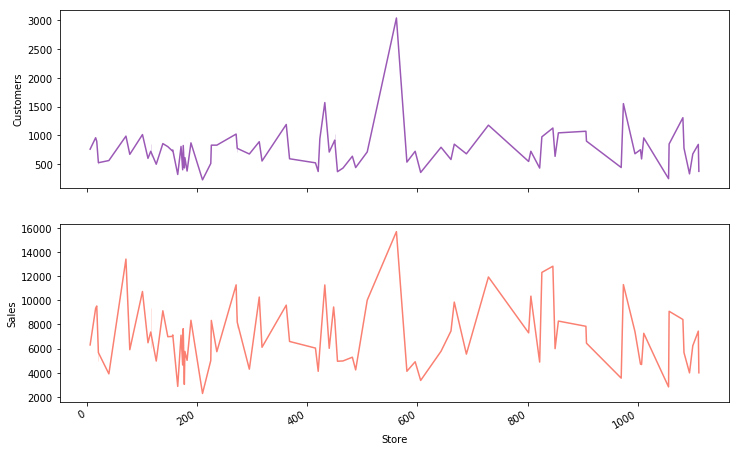

In [7]:
#
figbar, axesbar = plt.subplots(2, 1, sharey=False, figsize=(12, 8))
sns.lineplot(x="Store", y="Customers", color="#9b59b6",ax=axesbar[0],data=train_data[train_data["Sales"]>0].sample(frac=0.0001,random_state=1))
sns.lineplot(x="Store", y="Sales", color="salmon",ax=axesbar[1],data=train_data[train_data["Sales"]>0].sample(frac=0.0001,random_state=1))
figbar.autofmt_xdate()

可以看到顾客量的趋势与销量的趋势具有很高的相识性，所以这里加入一个新的特征--‘人均消费额（SalePerCustomer）’

In [3]:
train_data["SalePerCustomer"]=train_data["Sales"]/train_data["Customers"]

### 时序观察

D:\Anaconda\envs\data_science\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


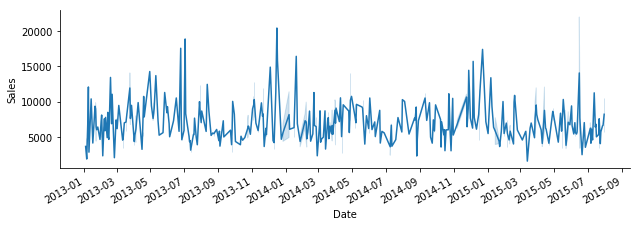

In [9]:
#
train_sales = train_data[train_data["Sales"]>0]

gsales=sns.relplot(x="Date",y="Sales",kind="line",height=3,aspect=3,data=train_sales.sample(frac=0.0005,random_state=1))
gsales.ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#g.ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
gsales.fig.autofmt_xdate()

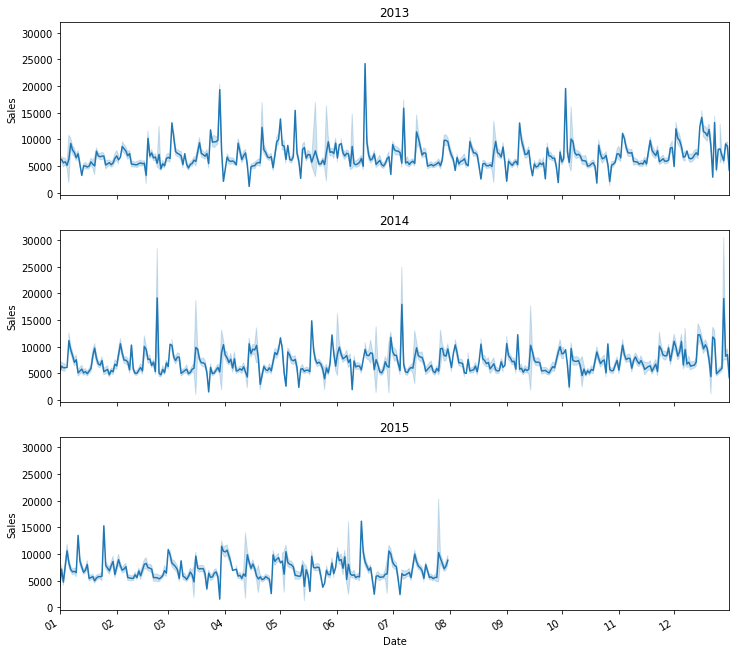

In [10]:
#
fig, axes = plt.subplots(3, 1, sharey=False, figsize=(12, 12))

for n in list(range(3)):
    #axes[n].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
    #axes[n].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
    axes[n].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axes[n].xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    
sns.lineplot(x="Date",y="Sales",data=train_sales.sample(frac=0.05,random_state=1),ax=axes[0])
axes[0].set_xlim('2013-1-1','2013-12-31')
axes[0].set_title('2013')

sns.lineplot(x="Date",y="Sales",data=train_sales.sample(frac=0.05,random_state=1),ax=axes[1])
axes[1].set_xlim('2014-1-1','2014-12-31')
axes[1].set_title('2014')

sns.lineplot(x="Date",y="Sales",data=train_sales.sample(frac=0.05,random_state=1),ax=axes[2])
axes[2].set_xlim('2015-1-1','2015-12-31')
axes[2].set_title('2015')

fig.autofmt_xdate()

## 商店数据

### 数据初步观察与清洗

In [4]:
store_data = pd.read_csv("store.csv")
store_data.head(n=5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [9]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [14]:
store_data[pd.isnull(store_data.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [15]:
store_data[pd.isnull(store_data.CompetitionOpenSinceMonth)].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [16]:
no_promo = store_data[pd.isnull(store_data.Promo2SinceWeek)]
no_promo[no_promo["Promo2"]==0].shape

(544, 10)

Promo2SinceWeek/Year 数据缺失是由于promo为0，所以将缺失项目都用0填充;CompetitionDistance等三项数据缺失原因不明，先以均值填充看看效果。

In [5]:
store_data["Promo2SinceWeek"].fillna(0,inplace=True)
store_data["Promo2SinceYear"].fillna(0,inplace=True)
store_data["PromoInterval"].fillna(0,inplace=True)

store_data["CompetitionDistance"].fillna(store_data["CompetitionDistance"].mean(),inplace=True)
store_data["CompetitionOpenSinceMonth"].fillna(store_data["CompetitionOpenSinceMonth"].mean(),inplace=True)
store_data["CompetitionOpenSinceYear"].fillna(store_data["CompetitionOpenSinceYear"].mean(),inplace=True)


## 与训练集融合进一步分析店铺状况

选取营业且销售额大于0的店铺

In [6]:
train_store_data = pd.merge(train_data,store_data,on="Store")
train_store_data = train_store_data[(train_store_data['Open']==1)&(train_store_data['Sales']>0)]

### 店铺种类分布情况

In [19]:
temp_tsd = train_store_data.groupby("StoreType")
tsdTpye_describe = temp_tsd.describe()
tsdTpye_describe

Store                                                     \
              count        mean         std   min    25%    50%    75%   
StoreType                                                                
a          457042.0  560.087410  325.810963   2.0  276.0  557.0  848.0   
b           15560.0  555.930077  286.817822  85.0  335.0  512.0  733.0   
c          112968.0  608.222337  325.611777   1.0  362.0  613.0  897.0   
d          258768.0  533.887432  311.987681  13.0  250.0  529.0  792.0   

                  DayOfWeek            ... Promo2SinceWeek        \
              max     count      mean  ...             75%   max   
StoreType                              ...                         
a          1114.0  457042.0  3.513502  ...            18.0  48.0   
b          1097.0   15560.0  3.998586  ...             5.0  48.0   
c          1112.0  112968.0  3.506400  ...            14.0  50.0   
d          1115.0  258768.0  3.509777  ...            28.0  49.0   

          Promo2SinceYear                                                      \
                    count         mean          std  min  25%     50%     75%   
StoreType                                                                       
a                457042.0   937.555750  1003.606049  0.0  0.0     0.0  2012.0   
b                 15560.0   580.940938   912.070935  0.0  0.0     0.0  2012.0   
c                112968.0  1000.889526  1005.761586  0.0  0.0     0.0  2011.0   
d                258768.0  1145.546053   996.075785  0.0  0.0  2009.0  2012.0   

                   
              max  
StoreType          
a          2015.0  
b          2013.0  
c          2014.0  
d          2015.0  

[4 rows x 112 columns]

([<matplotlib.patches.Wedge at 0x1e73e89d1d0>,
 [Text(-0.1423300006246476, 1.090753029297736, 'a'),
  Text(-1.045053484076021, -0.3433121253619944, 'b'),
  Text(-0.7698195044469102, -0.7857340075197928, 'c'),
  Text(0.6283304377448313, -0.9028847440307034, 'd')],
 [Text(-0.07763454579526231, 0.5949561977987651, '54%'),
  Text(-0.570029173132375, -0.18726115928836057, '2%'),
  Text(-0.4199015478801328, -0.428582185919887, '13%'),
  Text(0.3427256933153625, -0.49248258765311087, '31%')])

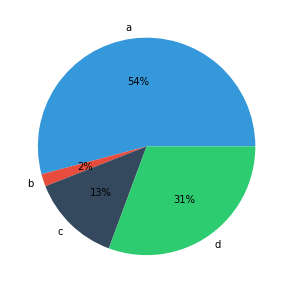

In [20]:
fracs = [tsdTpye_describe.iloc[0,0],tsdTpye_describe.iloc[1,0],tsdTpye_describe.iloc[2,0],tsdTpye_describe.iloc[3,0]]

fig = plt.figure(figsize=(5,5))
plt.pie(fracs, labels=tsdTpye_describe.index, colors=[ "#3498db", "#e74c3c", "#34495e", "#2ecc71"],autopct='%.0f%%')

### 不同类型销售量

In [21]:
temp_tsd['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


**将日期划分为年月日，便于根据分析年份与月份等分析数据**

In [7]:
#
train_store_data['Year']=train_store_data.Date.dt.year
train_store_data['Month']=train_store_data.Date.dt.month
train_store_data['Day']=train_store_data.Date.dt.day
train_store_data["WeekOfYear"]=train_store_data.Date.dt.weekofyear
train_store_data["Season"]=train_store_data.Date.dt.quarter
train_store_data['SeasonOfYear']=train_store_data['Year'].replace({2013:'2013',2014:'2014',2015:'2015'})+train_store_data["Season"].replace({1:'1',2:'2',3:'3',4:'4'})
#train_store_data["week"]=train_store_data.Date.dt.weekday # 星期

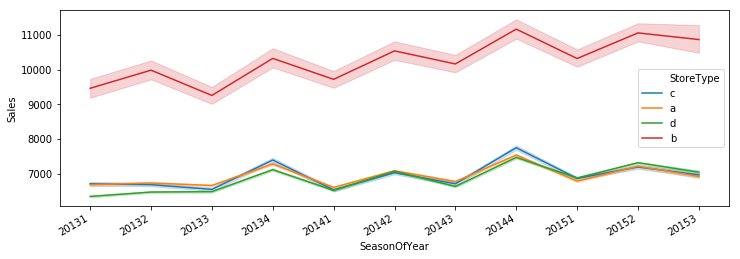

In [23]:
#
figtype, axestype = plt.subplots(1, 1, sharey=False, figsize=(12, 4))
sns.lineplot(x="SeasonOfYear", y="Sales",hue="StoreType",data=train_store_data,ax=axestype)
figtype.autofmt_xdate()

可以看到B类店铺平均销量原高于其他三类店铺，并且在2013年到2015年间保持稳定增长，而其他三类店铺则几乎没有改变，并且B类商铺要比其他三类商铺的季度波动性更强。

还可以看到四类店铺的销售额在第四季度都会有所上涨，有必要具体看看是哪个月份上涨最多。同时观察顾客量与人均销售额的趋势，因为这两项是影响销售额的直接原因。

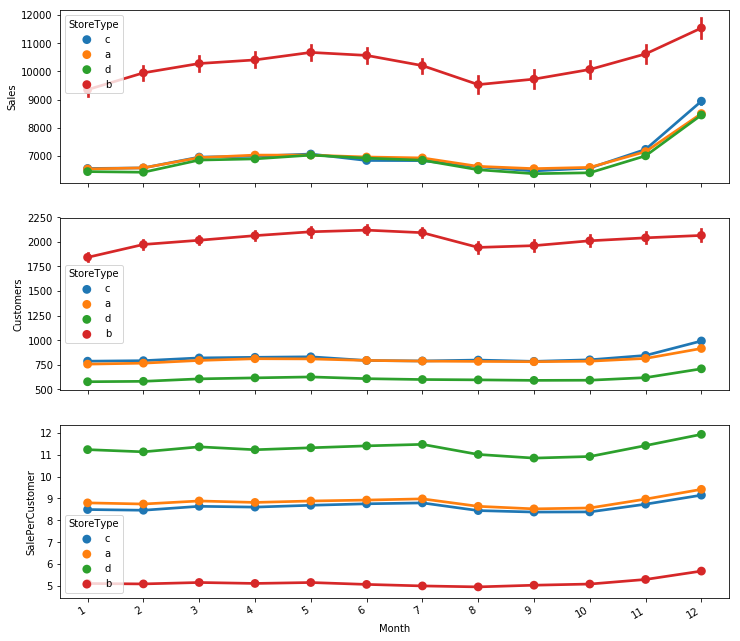

In [24]:
#
figMon_Sale_Cus, axesMon_Sale_Cus = plt.subplots(3, 1, sharey=False, figsize=(12, 12))
sns.pointplot(x="Month", y="Sales",hue="StoreType",data=train_store_data,ax=axesMon_Sale_Cus[0])
sns.pointplot(x="Month", y="Customers",hue="StoreType",data=train_store_data,ax=axesMon_Sale_Cus[1])
sns.pointplot(x="Month", y="SalePerCustomer",hue="StoreType",data=train_store_data,ax=axesMon_Sale_Cus[2])

figMon_Sale_Cus.autofmt_xdate()

四类店铺的销售、顾客量的峰值都在12月份出现，但还可以发现B类店铺的高销售额是靠大量的顾客换取的，也就是说这些顾客人均消费非常低，相反D类店铺的人均消费是最高的。

### 促销与销售额关系

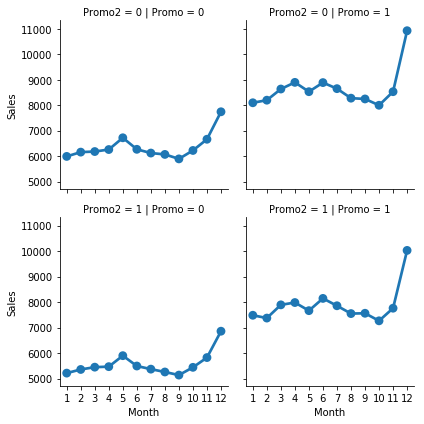

In [25]:
sns.catplot(x='Month',y='Sales',col='Promo',row='Promo2',kind='point',height=3,aspect=1,data=train_store_data)

从图中可之有短期促销的店铺销量要大于无短期促销的店铺销量；有长期促销的店铺销量低于无长期促销的店铺销量

### 节假日与销售额关系

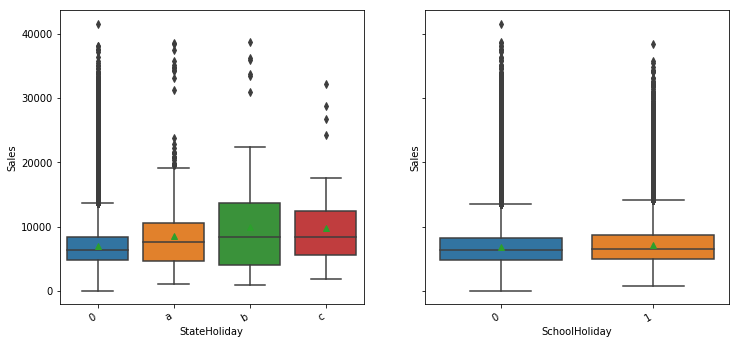

In [26]:
#
figHoli,axesHoli = plt.subplots(1,2,sharex=False,sharey=True,figsize=(12,6))

sns.boxplot(x="StateHoliday",y="Sales",
            showmeans=True,
            data=train_store_data,
            ax=axesHoli[0])
sns.boxplot(x="SchoolHoliday",y="Sales",
            showmeans=True,
            data=train_store_data,
            ax=axesHoli[1])

figHoli.autofmt_xdate()

从箱线图可发现在节假日开门的商铺的销售额要大于平日的销售额,在学校假期期间商铺的销售额也会略高于平日。

### 竞争对手与销售额关系

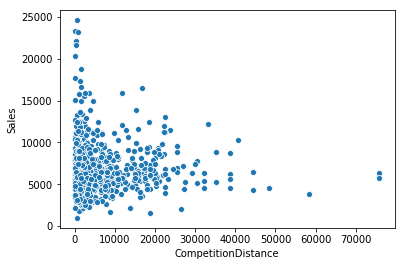

In [27]:
sns.scatterplot(x="CompetitionDistance", y="Sales",data=train_store_data.sample(frac=0.001,random_state=1))
#sns.jointplot(x="CompetitionDistance", y="Sales", data=train_store_data.sample(frac=0.0005,random_state=1));

从图中无法看出竞争对手的距离与销售额有非常必然的联系。


**构建竞争对手开业时间与促销时间特征：**

In [8]:
#
train_store_data['CompetitionOpen'] = 12 * (train_store_data.Year - train_store_data.CompetitionOpenSinceYear) + (train_store_data.Month - train_store_data.CompetitionOpenSinceMonth)
train_store_data['PromoOpen'] = 12 * (train_store_data.Year - train_store_data.Promo2SinceYear) + (train_store_data.WeekOfYear - train_store_data.Promo2SinceWeek) / 4.0
train_store_data.loc[train_store_data.Promo2SinceYear==0,'PromoOpen']=0

**构建‘是否促销月’特征**

In [9]:
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
train_store_data['monthStr'] = train_store_data.Month.map(month2str)
train_store_data.loc[train_store_data.PromoInterval == 0, 'PromoInterval'] = ''
train_store_data['IsPromoMonth'] = 0
for interval in train_store_data.PromoInterval.unique():
    if interval != '':
        for month in interval.split(','):
            train_store_data.loc[(train_store_data.monthStr == month) & (train_store_data.PromoInterval == interval), 'IsPromoMonth'] = 1

In [14]:
train_store_data.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,10.958105,61.115771
b,10233.380141,2022.211825,3.717593,66.607652
c,6933.126425,815.538073,13.964386,62.149077
d,6822.300064,606.353935,14.827699,57.808354


### 总体关联性

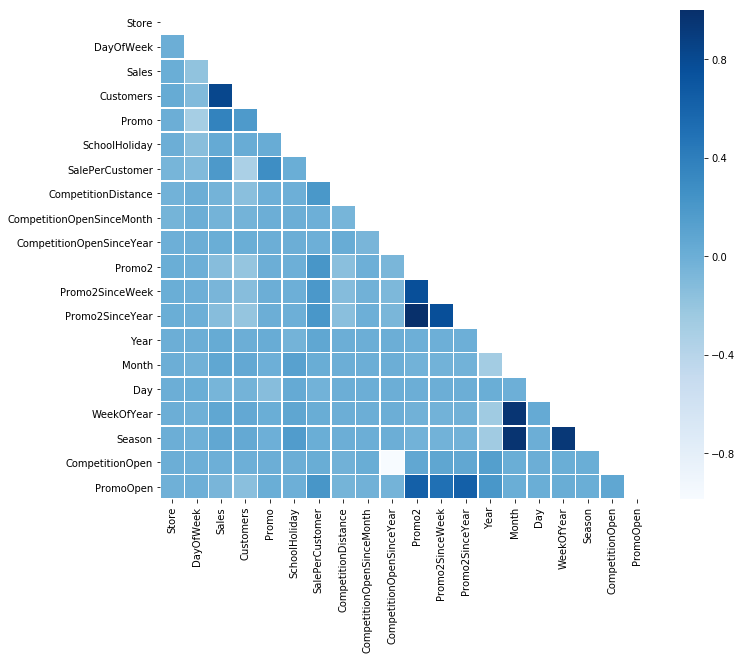

In [30]:
f, ax = plt.subplots(figsize = (11, 9))
                     
corr = train_store_data.drop("Open",axis=1).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "Blues")

## 测试集

### 数据初步观察与清洗

In [10]:
test_data=pd.read_csv("test.csv",parse_dates = [3],low_memory = False)
test_data.head(n=5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [16]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [17]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [18]:
test_data[pd.isnull(test_data.Open)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


缺失数据来只622号店铺，时间从周一到周六，不是假日时间，且有几天还在促销，故认为是正常营业状态，以1填充缺失数据。

In [11]:
test_data["Open"].fillna(1,inplace=True)

### 合并数据

In [12]:
test_store_data = pd.merge(test_data,store_data,on="Store")

In [21]:
test_store_data.head(n=3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### 构建特征

In [13]:
#
test_store_data['Year']=test_store_data.Date.dt.year
test_store_data['Month']=test_store_data.Date.dt.month
test_store_data['Day']=test_store_data.Date.dt.day
test_store_data["WeekOfYear"]=test_store_data.Date.dt.weekofyear
test_store_data["Season"]=test_store_data.Date.dt.quarter

test_store_data['CompetitionOpen'] = 12 * (test_store_data.Year - test_store_data.CompetitionOpenSinceYear) + (test_store_data.Month - test_store_data.CompetitionOpenSinceMonth)
test_store_data['PromoOpen'] = 12 * (test_store_data.Year - test_store_data.Promo2SinceYear) + (test_store_data.WeekOfYear - test_store_data.Promo2SinceWeek) / 4.0
test_store_data.loc[test_store_data.Promo2SinceYear==0,'PromoOpen']=0

In [14]:
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
test_store_data['monthStr'] = test_store_data.Month.map(month2str)
test_store_data.loc[test_store_data.PromoInterval == 0, 'PromoInterval'] = ''
test_store_data['IsPromoMonth'] = 0
for interval in test_store_data.PromoInterval.unique():
    if interval != '':
        for month in interval.split(','):
            test_store_data.loc[(test_store_data.monthStr == month) & (test_store_data.PromoInterval == interval), 'IsPromoMonth'] = 1

## 其余特征处理
### 特征转换

In [15]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
train_store_data.Assortment.replace(mappings,inplace=True)
train_store_data.StateHoliday.replace(mappings,inplace=True)
train_store_data.StoreType.replace(mappings,inplace=True)

test_store_data.Assortment.replace(mappings,inplace=True)
test_store_data.StateHoliday.replace(mappings,inplace=True)
test_store_data.StoreType.replace(mappings,inplace=True)

In [16]:
train_store_data['Assortment'] = train_store_data['Assortment'].astype('int')
train_store_data['StateHoliday'] = train_store_data['StateHoliday'].astype('int')

test_store_data['Assortment'] = test_store_data['Assortment'].astype('int')
test_store_data['StateHoliday'] = test_store_data['StateHoliday'].astype('int')

### 删除不必要特征

In [17]:
train_store_data.drop(['Date','Customers','Open','PromoInterval','SeasonOfYear','monthStr'], axis = 1, inplace = True)
test_store_datax = test_store_data.drop(['Id','Date','Open','PromoInterval','monthStr'], axis = 1)

### 拆分待预测特征标签

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [19]:
train_store_x = train_store_data.drop(['Sales'],axis=1)
train_store_y = np.log(train_store_data['Sales'])

X_train, X_test, y_train, y_test = train_test_split(train_store_x, 
                                                    train_store_y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

## 定义评价函数

In [15]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat / y-1) ** 2))

def rmspe_dtr(yhat, y):
    y = np.expm1(y)
    yhat = np.expm1(yhat)
    return rmspe(y, yhat)

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y, yhat)

## 模型训练

### 决策树基准模型训练

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  make_scorer

In [46]:
dtr_model2=DecisionTreeRegressor()
dtr_model2.fit(X_train,y_train)

y_train_pred = dtr_model2.predict(X_train)
y_test_pred = dtr_model2.predict(X_test)

train_score = rmspe_dtr(y_train_pred,y_train)
test_score = rmspe_dtr(y_test_pred,y_test)
'''
train_score = rmspe(y_train,y_train_pred)
test_score = rmspe(y_test,y_test_pred)
'''
print("train",train_score)
print("test",test_score)

train 2.24718279789952e-05
test 0.20458289174813168


网格搜索优化基准模型

In [47]:
params_dtr={"max_depth":[32,35,38],"min_samples_leaf":[6,7,8,9]}
scorer = make_scorer(rmspe_dtr,greater_is_better=False)
grid_dtr=GridSearchCV(dtr_model2,params_dtr,scoring=scorer,cv=3)

In [48]:
grid_dtr_fitted = grid_dtr.fit(X_train, y_train)

In [49]:
grid_dtr_fitted.best_params_

{'max_depth': 35, 'min_samples_leaf': 8}

In [50]:
dtr_best_model = grid_dtr_fitted.best_estimator_
y_test_bestpred=dtr_best_model.predict(X_test)
test_bestscore = rmspe_dtr(y_test_bestpred,y_test)
print("test",test_bestscore)

test 0.17159499694678332


### XGB模型训练

In [2]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

### 参数设定

In [22]:
params = {
    'booster': 'gbtree', 
    'objective': 'reg:linear', 
    'subsample': 0.8,
    'colsample_bytree': 1,
    'eta': 0.3,
    'max_depth':6,
    'seed': 42} 

In [22]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [23]:
xgb_model = xgb.train(params, dtrain, 300, 
                      evals = watchlist,
                      early_stopping_rounds = 50, 
                      feval = rmspe_xg,
                      verbose_eval = True)

[17:09:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:5.79373	test-rmse:5.7941	train-rmspe:0.996832	test-rmspe:0.996832
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 50 rounds.
[17:09:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:4.0634	test-rmse:4.06363	train-rmspe:0.98144	test-rmspe:0.981437
[17:09:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:2.855	test-rmse:2.85514	train-rmspe:0.937699	test-rmspe:0.937656
[17:09:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:2.01351	test-rmse:2.01365	train-rmspe:0.855735	test-rmspe:0.855484
[17:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes

[17:09:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[41]	train-rmse:0.219172	test-rmse:0.219575	train-rmspe:0.292577	test-rmspe:0.251099
[17:09:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[42]	train-rmse:0.215839	test-rmse:0.216329	train-rmspe:0.289003	test-rmspe:0.247224
[17:09:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[43]	train-rmse:0.213541	test-rmse:0.214094	train-rmspe:0.286999	test-rmspe:0.244983
[17:09:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[44]	train-rmse:0.21303	test-rmse:0.213589	train-rmspe:0.286653	test-rmspe:0.244446
[17:09:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[45]	train-rmse:0.212174	test-rmse:0.212728	train-rmspe:0.285744	test-rmspe:0.243262
[17:09:50] 

[17:10:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[83]	train-rmse:0.167246	test-rmse:0.168216	train-rmspe:0.244339	test-rmspe:0.191301
[17:10:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[84]	train-rmse:0.166181	test-rmse:0.167145	train-rmspe:0.243683	test-rmspe:0.190314
[17:10:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[85]	train-rmse:0.164524	test-rmse:0.165426	train-rmspe:0.24212	test-rmspe:0.188123
[17:10:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[86]	train-rmse:0.163797	test-rmse:0.164705	train-rmspe:0.241419	test-rmspe:0.187369
[17:10:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[87]	train-rmse:0.163463	test-rmse:0.164387	train-rmspe:0.240772	test-rmspe:0.187091
[17:10:18] 

[17:10:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[125]	train-rmse:0.144024	test-rmse:0.145354	train-rmspe:0.221665	test-rmspe:0.166963
[17:10:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[126]	train-rmse:0.143638	test-rmse:0.144998	train-rmspe:0.221368	test-rmspe:0.166607
[17:10:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[127]	train-rmse:0.14338	test-rmse:0.144735	train-rmspe:0.223079	test-rmspe:0.166301
[17:10:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[128]	train-rmse:0.142443	test-rmse:0.143775	train-rmspe:0.222477	test-rmspe:0.16531
[17:10:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[129]	train-rmse:0.141572	test-rmse:0.142882	train-rmspe:0.221724	test-rmspe:0.164251
[17:10:

[17:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[167]	train-rmse:0.129777	test-rmse:0.131541	train-rmspe:0.211055	test-rmspe:0.149353
[17:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[168]	train-rmse:0.129424	test-rmse:0.131173	train-rmspe:0.21074	test-rmspe:0.148956
[17:11:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[169]	train-rmse:0.128978	test-rmse:0.130721	train-rmspe:0.210378	test-rmspe:0.148406
[17:11:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[170]	train-rmse:0.12869	test-rmse:0.130445	train-rmspe:0.21022	test-rmspe:0.148132
[17:11:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[171]	train-rmse:0.128269	test-rmse:0.130029	train-rmspe:0.209822	test-rmspe:0.147689
[17:11:1

[17:11:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[209]	train-rmse:0.121871	test-rmse:0.124037	train-rmspe:0.207548	test-rmspe:0.141555
[17:11:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[210]	train-rmse:0.121678	test-rmse:0.123861	train-rmspe:0.207417	test-rmspe:0.141371
[17:11:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[211]	train-rmse:0.121599	test-rmse:0.123777	train-rmspe:0.207366	test-rmspe:0.141315
[17:11:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[212]	train-rmse:0.121433	test-rmse:0.123624	train-rmspe:0.207204	test-rmspe:0.141214
[17:11:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[213]	train-rmse:0.121246	test-rmse:0.123469	train-rmspe:0.207088	test-rmspe:0.141047
[17:1

[17:12:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[251]	train-rmse:0.116371	test-rmse:0.119021	train-rmspe:0.201326	test-rmspe:0.135879
[17:12:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[252]	train-rmse:0.116271	test-rmse:0.118935	train-rmspe:0.200396	test-rmspe:0.135785
[17:12:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[253]	train-rmse:0.116138	test-rmse:0.118818	train-rmspe:0.200297	test-rmspe:0.135671
[17:12:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[254]	train-rmse:0.116068	test-rmse:0.118783	train-rmspe:0.200241	test-rmspe:0.135615
[17:12:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[255]	train-rmse:0.115953	test-rmse:0.118688	train-rmspe:0.200184	test-rmspe:0.135521
[17:1

[17:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[293]	train-rmse:0.11234	test-rmse:0.115524	train-rmspe:0.192861	test-rmspe:0.131922
[17:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[294]	train-rmse:0.112303	test-rmse:0.11549	train-rmspe:0.192856	test-rmspe:0.131903
[17:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[295]	train-rmse:0.112127	test-rmse:0.115319	train-rmspe:0.192575	test-rmspe:0.131675
[17:12:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[296]	train-rmse:0.112064	test-rmse:0.115256	train-rmspe:0.192523	test-rmspe:0.13162
[17:12:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[297]	train-rmse:0.112015	test-rmse:0.115224	train-rmspe:0.192466	test-rmspe:0.131593
[17:12:5

网格搜索优化XGB

In [24]:
params_skxgb = {'max_depth': 6, 
            'n_estimators': 300, # the same as num_rounds in xgboost
            'objective': 'reg:linear', 
            'subsample': 0.8, 
            'colsample_bytree': 0.8, 
            'learning_rate': 0.3, 
            'seed': 42}     

skxgb_model = XGBRegressor(**params_skxgb)

skxgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.8)

In [25]:
params_grid = {  
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [6,10,15],
    'gamma': [0.7,0.8,0.9],
    'reg_alpha': [10,20,25]}

search_skxgb = RandomizedSearchCV(skxgb_model, params_grid, cv = 3) # 3 fold cross validation
search_skxgb.fit(X_train, y_train)

# best parameters
print(search_skxgb.best_params_); print(search_skxgb.best_score_)

{'reg_alpha': 10, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.9}
0.9093704012223507


In [28]:
params_final = {
    'booster': 'gbtree', 
    'objective': 'reg:linear', 
    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
    'eta': 0.2, 
    'max_depth': 15, 
    'gamma': 0.9,
    'reg_alpha': 10,
    'silent':1,
    'seed': 42} 

In [29]:
xgb_model_final = xgb.train(params_final, dtrain, 300, 
                      evals = watchlist,
                      early_stopping_rounds = 100, 
                      feval = rmspe_xg,
                      verbose_eval = True)

[0]	train-rmse:6.61896	test-rmse:6.61944	train-rmspe:0.998698	test-rmspe:0.998698
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:5.29968	test-rmse:5.30018	train-rmspe:0.994689	test-rmspe:0.994689
[2]	train-rmse:4.24522	test-rmse:4.24571	train-rmspe:0.984496	test-rmspe:0.984497
[3]	train-rmse:3.40297	test-rmse:3.40341	train-rmspe:0.963843	test-rmspe:0.963839
[4]	train-rmse:2.73046	test-rmse:2.73085	train-rmspe:0.929201	test-rmspe:0.929169
[5]	train-rmse:2.19451	test-rmse:2.19493	train-rmspe:0.8791	test-rmspe:0.878983
[6]	train-rmse:1.76729	test-rmse:1.76776	train-rmspe:0.815444	test-rmspe:0.815134
[7]	train-rmse:1.42658	test-rmse:1.42718	train-rmspe:0.742504	test-rmspe:0.741787
[8]	train-rmse:1.15696	test-rmse:1.15754	train-rmspe:0.665116	test-rmspe:0.663604
[9]	train-rmse:0.943231	test-rmse:0.94384	train-rmspe:0.589172	test-rmspe:0.586551
[10]	train-rmse:0.773911	test-rmse:

[96]	train-rmse:0.125081	test-rmse:0.126076	train-rmspe:0.212777	test-rmspe:0.145882
[97]	train-rmse:0.125028	test-rmse:0.126024	train-rmspe:0.21273	test-rmspe:0.145821
[98]	train-rmse:0.124842	test-rmse:0.125827	train-rmspe:0.212525	test-rmspe:0.14559
[99]	train-rmse:0.124787	test-rmse:0.125775	train-rmspe:0.212459	test-rmspe:0.145544
[100]	train-rmse:0.124728	test-rmse:0.125719	train-rmspe:0.212424	test-rmspe:0.145492
[101]	train-rmse:0.124695	test-rmse:0.125689	train-rmspe:0.212436	test-rmspe:0.145465
[102]	train-rmse:0.124677	test-rmse:0.125675	train-rmspe:0.212411	test-rmspe:0.145457
[103]	train-rmse:0.124531	test-rmse:0.125537	train-rmspe:0.21232	test-rmspe:0.145334
[104]	train-rmse:0.124509	test-rmse:0.125515	train-rmspe:0.212287	test-rmspe:0.145307
[105]	train-rmse:0.124419	test-rmse:0.125429	train-rmspe:0.212446	test-rmspe:0.145269
[106]	train-rmse:0.124402	test-rmse:0.125415	train-rmspe:0.21243	test-rmspe:0.145274
[107]	train-rmse:0.12432	test-rmse:0.125334	train-rmspe:0.2123

[192]	train-rmse:0.120531	test-rmse:0.121596	train-rmspe:0.210464	test-rmspe:0.140461
[193]	train-rmse:0.120531	test-rmse:0.121596	train-rmspe:0.210464	test-rmspe:0.140461
[194]	train-rmse:0.120512	test-rmse:0.121578	train-rmspe:0.210442	test-rmspe:0.140427
[195]	train-rmse:0.120512	test-rmse:0.121578	train-rmspe:0.210442	test-rmspe:0.140427
[196]	train-rmse:0.120489	test-rmse:0.121558	train-rmspe:0.210347	test-rmspe:0.140411
[197]	train-rmse:0.120489	test-rmse:0.121558	train-rmspe:0.210346	test-rmspe:0.14041
[198]	train-rmse:0.120476	test-rmse:0.121545	train-rmspe:0.210344	test-rmspe:0.140395
[199]	train-rmse:0.120458	test-rmse:0.121527	train-rmspe:0.210305	test-rmspe:0.140378
[200]	train-rmse:0.120413	test-rmse:0.12148	train-rmspe:0.21028	test-rmspe:0.140318
[201]	train-rmse:0.120402	test-rmse:0.12147	train-rmspe:0.210281	test-rmspe:0.140318
[202]	train-rmse:0.120402	test-rmse:0.12147	train-rmspe:0.21028	test-rmspe:0.140318
[203]	train-rmse:0.120349	test-rmse:0.121415	train-rmspe:0.2

[288]	train-rmse:0.119145	test-rmse:0.12025	train-rmspe:0.209248	test-rmspe:0.139052
[289]	train-rmse:0.119135	test-rmse:0.120242	train-rmspe:0.209222	test-rmspe:0.139043
[290]	train-rmse:0.119135	test-rmse:0.120242	train-rmspe:0.209222	test-rmspe:0.139042
[291]	train-rmse:0.119118	test-rmse:0.120225	train-rmspe:0.209178	test-rmspe:0.139026
[292]	train-rmse:0.119118	test-rmse:0.120225	train-rmspe:0.20917	test-rmspe:0.13902
[293]	train-rmse:0.119093	test-rmse:0.120204	train-rmspe:0.209079	test-rmspe:0.139014
[294]	train-rmse:0.119093	test-rmse:0.120204	train-rmspe:0.209077	test-rmspe:0.139013
[295]	train-rmse:0.119067	test-rmse:0.120179	train-rmspe:0.209047	test-rmspe:0.138971
[296]	train-rmse:0.119051	test-rmse:0.120163	train-rmspe:0.209035	test-rmspe:0.138959
[297]	train-rmse:0.119034	test-rmse:0.120146	train-rmspe:0.209013	test-rmspe:0.138934
[298]	train-rmse:0.119026	test-rmse:0.12014	train-rmspe:0.209009	test-rmspe:0.138929
[299]	train-rmse:0.119002	test-rmse:0.120121	train-rmspe:0

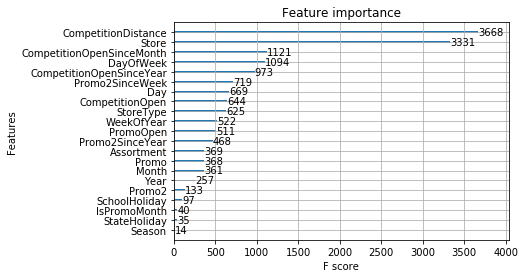

In [32]:
xgb.plot_importance(xgb_model_final)

In [ ]:
unseen = xgb.DMatrix(test_store_datax)

In [32]:
#
test_predict = xgb_model_final.predict(unseen)

forecasts = pd.DataFrame({'Id': test_store_data['Id'], 
                          'Sales': np.exp(test_predict)})
forecasts.head()

,Id,Sales
0,1,4366.302734
1,857,4496.148438
2,1713,5002.268555
3,2569,5881.882812
4,3425,4469.625000


In [33]:
forecasts.to_csv('forecasts18.csv',index = False)

----
----

# 修改：

In [3]:
def features_create(data):
    
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +(data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
    return data

In [4]:
train_data_md=pd.read_csv("train.csv",parse_dates = [2],low_memory = False)
test_data_md=pd.read_csv("test.csv",parse_dates = [3],low_memory = False)
store_data_md = pd.read_csv("store.csv",low_memory=False)

In [5]:
store_data_md["Promo2SinceWeek"].fillna(0,inplace=True)
store_data_md["Promo2SinceYear"].fillna(0,inplace=True)
store_data_md["PromoInterval"].fillna(0,inplace=True)

store_data_md["CompetitionDistance"].fillna(store_data_md["CompetitionDistance"].mean(),inplace=True)
store_data_md["CompetitionOpenSinceMonth"].fillna(store_data_md["CompetitionOpenSinceMonth"].mean(),inplace=True)
store_data_md["CompetitionOpenSinceYear"].fillna(store_data_md["CompetitionOpenSinceYear"].mean(),inplace=True)

test_data_md["Open"].fillna(1,inplace=True)

In [6]:
train_store_data_md = pd.merge(train_data_md,store_data_md,on="Store")
test_store_data_md = pd.merge(test_data_md,store_data_md,on="Store")

**修改1：使用时间顺序划分模型：**

In [7]:
train_store_data_md = train_store_data_md.sort_values(['Date'],ascending = False)
X_test_md = train_store_data_md[:6*7*1115]
X_train_md = train_store_data_md[6*7*1115:]

X_test_md = X_test_md[X_test_md["Open"] != 0]
X_test_md = X_test_md[X_test_md["Sales"] > 0]
X_train_md = X_train_md[X_train_md["Open"] != 0]
X_train_md = X_train_md[X_train_md["Sales"] > 0]

In [8]:
features_create(X_train_md)
features_create(X_test_md)
features_create(test_store_data_md)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth
0,1,1,3,2015-09-17,1.0,1,0,0,3,1,...,0.0,,2015,9,17,38,84.000000,24189.50,Sept,0
1,857,1,2,2015-09-16,1.0,1,0,0,3,1,...,0.0,,2015,9,16,38,84.000000,24189.50,Sept,0
2,1713,1,1,2015-09-15,1.0,1,0,0,3,1,...,0.0,,2015,9,15,38,84.000000,24189.50,Sept,0
3,2569,1,0,2015-09-14,1.0,1,0,0,3,1,...,0.0,,2015,9,14,38,84.000000,24189.50,Sept,0
4,3425,1,6,2015-09-13,0.0,0,0,0,3,1,...,0.0,,2015,9,13,37,84.000000,24189.25,Sept,0
5,4281,1,5,2015-09-12,1.0,0,0,0,3,1,...,0.0,,2015,9,12,37,84.000000,24189.25,Sept,0
6,5137,1,4,2015-09-11,1.0,0,0,0,3,1,...,0.0,,2015,9,11,37,84.000000,24189.25,Sept,0
7,5993,1,3,2015-09-10,1.0,0,0,0,3,1,...,0.0,,2015,9,10,37,84.000000,24189.25,Sept,0
8,6849,1,2,2015-09-09,1.0,0,0,0,3,1,...,0.0,,2015,9,9,37,84.000000,24189.25,Sept,0
9,7705,1,1,2015-09-08,1.0,0,0,0,3,1,...,0.0,,2015,9,8,37,84.000000,24189.25,Sept,0


In [9]:
X_train_md.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
X_test_md.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
test_store_datax_md=test_store_data_md.drop(['Id','Date','Open','PromoInterval','monthStr'], axis = 1)

In [10]:
X_train_md['Assortment'] = X_train_md['Assortment'].astype('int')
X_train_md['StateHoliday'] = X_train_md['StateHoliday'].astype('int')

X_test_md['Assortment'] = X_test_md['Assortment'].astype('int')
X_test_md['StateHoliday'] = X_test_md['StateHoliday'].astype('int')

test_store_datax_md['Assortment'] = test_store_datax_md['Assortment'].astype('int')
test_store_datax_md['StateHoliday'] = test_store_datax_md['StateHoliday'].astype('int')

In [11]:
X_xtrain_md = X_train_md.drop(['Sales'],axis=1 )
X_ytrain_md = np.log1p(X_train_md.Sales)
X_xtest_md = X_test_md.drop(['Sales'],axis=1 )
X_ytest_md = np.log1p(X_test_md.Sales)

**修改2：将学习率调低至0.03进行训练**

In [12]:
params_final_md = {
    'booster': 'gbtree', 
    'objective': 'reg:linear', 
    'subsample': 0.9, 
    'colsample_bytree': 0.8, 
    'eta': 0.03, 
    'max_depth': 10, 
    'silent':1,
    'seed': 42} 

In [13]:
dtrain_md = xgb.DMatrix(X_xtrain_md, X_ytrain_md)
dtest_md = xgb.DMatrix(X_xtest_md, X_ytest_md)

watchlist_md = [(dtrain_md, 'train'), (dtest_md, 'eval')]

In [16]:
xgb_model_final_md = xgb.train(params_final_md, dtrain_md,6000, 
                      evals = watchlist_md,
                      early_stopping_rounds = 100, 
                      feval = rmspe_xg,
                      verbose_eval = True)

[0]	train-rmse:8.02074	eval-rmse:8.02795	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.78057	eval-rmse:7.78792	train-rmspe:0.999711	eval-rmspe:0.999715
[2]	train-rmse:7.54761	eval-rmse:7.55536	train-rmspe:0.999591	eval-rmspe:0.999596
[3]	train-rmse:7.32169	eval-rmse:7.32969	train-rmspe:0.999445	eval-rmspe:0.999452
[4]	train-rmse:7.10254	eval-rmse:7.11051	train-rmspe:0.999268	eval-rmspe:0.999277
[5]	train-rmse:6.88995	eval-rmse:6.89817	train-rmspe:0.999055	eval-rmspe:0.999068
[6]	train-rmse:6.68376	eval-rmse:6.6927	train-rmspe:0.998801	eval-rmspe:0.998818
[7]	train-rmse:6.4838	eval-rmse:6.49218	train-rmspe:0.9985	eval-rmspe:0.99852
[8]	train-rmse:6.28981	eval-rmse:6.2981	train-rmspe:0.998145	eval-rmspe:0.998169
[9]	train-rmse:6.10166	eval-rmse:6.1102	train-rmspe:0.997728	eval-rmspe:0.997759
[10]	train-rmse:5.9192	eval-rmse:5.92719	

[97]	train-rmse:0.492348	eval-rmse:0.485264	train-rmspe:0.380574	eval-rmspe:0.36422
[98]	train-rmse:0.481063	eval-rmse:0.474209	train-rmspe:0.374605	eval-rmspe:0.35785
[99]	train-rmse:0.470577	eval-rmse:0.463659	train-rmspe:0.368968	eval-rmspe:0.351701
[100]	train-rmse:0.460186	eval-rmse:0.453358	train-rmspe:0.363353	eval-rmspe:0.345659
[101]	train-rmse:0.450333	eval-rmse:0.44361	train-rmspe:0.358069	eval-rmspe:0.339955
[102]	train-rmse:0.440529	eval-rmse:0.433888	train-rmspe:0.352872	eval-rmspe:0.334282
[103]	train-rmse:0.431066	eval-rmse:0.424468	train-rmspe:0.347795	eval-rmspe:0.328691
[104]	train-rmse:0.422448	eval-rmse:0.416	train-rmspe:0.343224	eval-rmspe:0.32371
[105]	train-rmse:0.413836	eval-rmse:0.407478	train-rmspe:0.338612	eval-rmspe:0.318653
[106]	train-rmse:0.405869	eval-rmse:0.399464	train-rmspe:0.334436	eval-rmspe:0.313993
[107]	train-rmse:0.398064	eval-rmse:0.391873	train-rmspe:0.330374	eval-rmspe:0.309556
[108]	train-rmse:0.390708	eval-rmse:0.384868	train-rmspe:0.32658

[193]	train-rmse:0.205963	eval-rmse:0.215394	train-rmspe:0.250527	eval-rmspe:0.228632
[194]	train-rmse:0.205083	eval-rmse:0.214676	train-rmspe:0.249789	eval-rmspe:0.228004
[195]	train-rmse:0.204633	eval-rmse:0.214291	train-rmspe:0.249594	eval-rmspe:0.227753
[196]	train-rmse:0.203952	eval-rmse:0.213816	train-rmspe:0.249187	eval-rmspe:0.227543
[197]	train-rmse:0.20349	eval-rmse:0.213596	train-rmspe:0.249012	eval-rmspe:0.227554
[198]	train-rmse:0.203186	eval-rmse:0.213355	train-rmspe:0.248961	eval-rmspe:0.227457
[199]	train-rmse:0.202897	eval-rmse:0.213133	train-rmspe:0.248794	eval-rmspe:0.227386
[200]	train-rmse:0.202014	eval-rmse:0.212419	train-rmspe:0.248071	eval-rmspe:0.226698
[201]	train-rmse:0.201345	eval-rmse:0.21188	train-rmspe:0.247665	eval-rmspe:0.226298
[202]	train-rmse:0.200875	eval-rmse:0.211579	train-rmspe:0.247007	eval-rmspe:0.226226
[203]	train-rmse:0.20047	eval-rmse:0.21122	train-rmspe:0.246823	eval-rmspe:0.226015
[204]	train-rmse:0.200019	eval-rmse:0.210854	train-rmspe:0

[289]	train-rmse:0.16702	eval-rmse:0.183312	train-rmspe:0.202147	eval-rmspe:0.199612
[290]	train-rmse:0.166521	eval-rmse:0.182829	train-rmspe:0.201661	eval-rmspe:0.199094
[291]	train-rmse:0.166221	eval-rmse:0.1826	train-rmspe:0.201273	eval-rmspe:0.198773
[292]	train-rmse:0.16586	eval-rmse:0.182299	train-rmspe:0.200598	eval-rmspe:0.198428
[293]	train-rmse:0.165503	eval-rmse:0.18172	train-rmspe:0.200258	eval-rmspe:0.197834
[294]	train-rmse:0.165287	eval-rmse:0.181531	train-rmspe:0.199938	eval-rmspe:0.197645
[295]	train-rmse:0.165169	eval-rmse:0.181465	train-rmspe:0.199814	eval-rmspe:0.197618
[296]	train-rmse:0.164564	eval-rmse:0.180914	train-rmspe:0.199256	eval-rmspe:0.19701
[297]	train-rmse:0.164295	eval-rmse:0.180681	train-rmspe:0.198986	eval-rmspe:0.196717
[298]	train-rmse:0.163929	eval-rmse:0.180359	train-rmspe:0.198644	eval-rmspe:0.19636
[299]	train-rmse:0.163669	eval-rmse:0.180166	train-rmspe:0.198408	eval-rmspe:0.196202
[300]	train-rmse:0.16363	eval-rmse:0.180136	train-rmspe:0.197

[385]	train-rmse:0.140675	eval-rmse:0.16078	train-rmspe:0.168328	eval-rmspe:0.174948
[386]	train-rmse:0.140586	eval-rmse:0.160697	train-rmspe:0.167847	eval-rmspe:0.174874
[387]	train-rmse:0.140317	eval-rmse:0.160599	train-rmspe:0.167554	eval-rmspe:0.174855
[388]	train-rmse:0.140158	eval-rmse:0.160469	train-rmspe:0.167415	eval-rmspe:0.1747
[389]	train-rmse:0.14009	eval-rmse:0.160402	train-rmspe:0.167	eval-rmspe:0.174634
[390]	train-rmse:0.139554	eval-rmse:0.159957	train-rmspe:0.166478	eval-rmspe:0.17413
[391]	train-rmse:0.138956	eval-rmse:0.159435	train-rmspe:0.165903	eval-rmspe:0.173542
[392]	train-rmse:0.138752	eval-rmse:0.159203	train-rmspe:0.165707	eval-rmspe:0.173275
[393]	train-rmse:0.138577	eval-rmse:0.159064	train-rmspe:0.165545	eval-rmspe:0.173131
[394]	train-rmse:0.138394	eval-rmse:0.158907	train-rmspe:0.165338	eval-rmspe:0.172952
[395]	train-rmse:0.138026	eval-rmse:0.158577	train-rmspe:0.164918	eval-rmspe:0.172588
[396]	train-rmse:0.137907	eval-rmse:0.158494	train-rmspe:0.164

[481]	train-rmse:0.123339	eval-rmse:0.147146	train-rmspe:0.146583	eval-rmspe:0.159751
[482]	train-rmse:0.123246	eval-rmse:0.147087	train-rmspe:0.146486	eval-rmspe:0.159702
[483]	train-rmse:0.12315	eval-rmse:0.146992	train-rmspe:0.146398	eval-rmspe:0.159583
[484]	train-rmse:0.123082	eval-rmse:0.146933	train-rmspe:0.146261	eval-rmspe:0.159513
[485]	train-rmse:0.123032	eval-rmse:0.146898	train-rmspe:0.14556	eval-rmspe:0.159479
[486]	train-rmse:0.122915	eval-rmse:0.146803	train-rmspe:0.14545	eval-rmspe:0.15938
[487]	train-rmse:0.122897	eval-rmse:0.14679	train-rmspe:0.145176	eval-rmspe:0.159366
[488]	train-rmse:0.122703	eval-rmse:0.146651	train-rmspe:0.144979	eval-rmspe:0.159206
[489]	train-rmse:0.122659	eval-rmse:0.146621	train-rmspe:0.144836	eval-rmspe:0.159175
[490]	train-rmse:0.122619	eval-rmse:0.14658	train-rmspe:0.144827	eval-rmspe:0.159138
[491]	train-rmse:0.122446	eval-rmse:0.146457	train-rmspe:0.144662	eval-rmspe:0.159015
[492]	train-rmse:0.122316	eval-rmse:0.146371	train-rmspe:0.1

[577]	train-rmse:0.11225	eval-rmse:0.138471	train-rmspe:0.133485	eval-rmspe:0.149922
[578]	train-rmse:0.112061	eval-rmse:0.13833	train-rmspe:0.133308	eval-rmspe:0.149758
[579]	train-rmse:0.111973	eval-rmse:0.138267	train-rmspe:0.13322	eval-rmspe:0.149685
[580]	train-rmse:0.111872	eval-rmse:0.138176	train-rmspe:0.133125	eval-rmspe:0.149594
[581]	train-rmse:0.111796	eval-rmse:0.138082	train-rmspe:0.133046	eval-rmspe:0.149471
[582]	train-rmse:0.111707	eval-rmse:0.138026	train-rmspe:0.13296	eval-rmspe:0.149406
[583]	train-rmse:0.111675	eval-rmse:0.137957	train-rmspe:0.132933	eval-rmspe:0.149319
[584]	train-rmse:0.111629	eval-rmse:0.137933	train-rmspe:0.132887	eval-rmspe:0.149293
[585]	train-rmse:0.111568	eval-rmse:0.137898	train-rmspe:0.132829	eval-rmspe:0.14925
[586]	train-rmse:0.111464	eval-rmse:0.13779	train-rmspe:0.132731	eval-rmspe:0.149122
[587]	train-rmse:0.111407	eval-rmse:0.137735	train-rmspe:0.132672	eval-rmspe:0.14905
[588]	train-rmse:0.111285	eval-rmse:0.13764	train-rmspe:0.132

[673]	train-rmse:0.105314	eval-rmse:0.133215	train-rmspe:0.124208	eval-rmspe:0.144002
[674]	train-rmse:0.10521	eval-rmse:0.133168	train-rmspe:0.124108	eval-rmspe:0.143937
[675]	train-rmse:0.105183	eval-rmse:0.133183	train-rmspe:0.124053	eval-rmspe:0.143965
[676]	train-rmse:0.105142	eval-rmse:0.133164	train-rmspe:0.123863	eval-rmspe:0.143953
[677]	train-rmse:0.105035	eval-rmse:0.133088	train-rmspe:0.123741	eval-rmspe:0.143868
[678]	train-rmse:0.104937	eval-rmse:0.13303	train-rmspe:0.123645	eval-rmspe:0.143809
[679]	train-rmse:0.104875	eval-rmse:0.132995	train-rmspe:0.123577	eval-rmspe:0.143769
[680]	train-rmse:0.104828	eval-rmse:0.132964	train-rmspe:0.123469	eval-rmspe:0.143734
[681]	train-rmse:0.104711	eval-rmse:0.132868	train-rmspe:0.123309	eval-rmspe:0.143637
[682]	train-rmse:0.104648	eval-rmse:0.132832	train-rmspe:0.123248	eval-rmspe:0.143588
[683]	train-rmse:0.104557	eval-rmse:0.132766	train-rmspe:0.12316	eval-rmspe:0.143512
[684]	train-rmse:0.104401	eval-rmse:0.132657	train-rmspe:

[769]	train-rmse:0.099974	eval-rmse:0.129831	train-rmspe:0.117305	eval-rmspe:0.140326
[770]	train-rmse:0.099934	eval-rmse:0.129802	train-rmspe:0.116775	eval-rmspe:0.140296
[771]	train-rmse:0.099884	eval-rmse:0.129776	train-rmspe:0.116716	eval-rmspe:0.140266
[772]	train-rmse:0.099826	eval-rmse:0.129766	train-rmspe:0.116637	eval-rmspe:0.140252
[773]	train-rmse:0.099795	eval-rmse:0.129763	train-rmspe:0.116606	eval-rmspe:0.140252
[774]	train-rmse:0.099754	eval-rmse:0.129726	train-rmspe:0.116544	eval-rmspe:0.140214
[775]	train-rmse:0.099724	eval-rmse:0.129713	train-rmspe:0.116513	eval-rmspe:0.140199
[776]	train-rmse:0.099662	eval-rmse:0.129672	train-rmspe:0.116451	eval-rmspe:0.140144
[777]	train-rmse:0.099607	eval-rmse:0.129631	train-rmspe:0.116366	eval-rmspe:0.140099
[778]	train-rmse:0.099565	eval-rmse:0.129598	train-rmspe:0.115899	eval-rmspe:0.140071
[779]	train-rmse:0.099509	eval-rmse:0.129563	train-rmspe:0.115435	eval-rmspe:0.140035
[780]	train-rmse:0.099478	eval-rmse:0.129544	train-rms

[865]	train-rmse:0.09586	eval-rmse:0.127919	train-rmspe:0.110577	eval-rmspe:0.13842
[866]	train-rmse:0.095803	eval-rmse:0.12789	train-rmspe:0.110491	eval-rmspe:0.13839
[867]	train-rmse:0.095761	eval-rmse:0.127885	train-rmspe:0.110414	eval-rmspe:0.138379
[868]	train-rmse:0.095703	eval-rmse:0.12783	train-rmspe:0.110339	eval-rmspe:0.138328
[869]	train-rmse:0.095662	eval-rmse:0.127808	train-rmspe:0.110268	eval-rmspe:0.138304
[870]	train-rmse:0.095611	eval-rmse:0.127776	train-rmspe:0.110215	eval-rmspe:0.138266
[871]	train-rmse:0.095555	eval-rmse:0.127748	train-rmspe:0.110099	eval-rmspe:0.138237
[872]	train-rmse:0.095533	eval-rmse:0.127747	train-rmspe:0.110079	eval-rmspe:0.138238
[873]	train-rmse:0.095482	eval-rmse:0.12772	train-rmspe:0.110028	eval-rmspe:0.138207
[874]	train-rmse:0.095444	eval-rmse:0.127696	train-rmspe:0.109987	eval-rmspe:0.138182
[875]	train-rmse:0.095418	eval-rmse:0.127686	train-rmspe:0.109963	eval-rmspe:0.138168
[876]	train-rmse:0.09538	eval-rmse:0.127669	train-rmspe:0.10

[961]	train-rmse:0.092534	eval-rmse:0.126089	train-rmspe:0.106744	eval-rmspe:0.136266
[962]	train-rmse:0.092524	eval-rmse:0.126083	train-rmspe:0.106729	eval-rmspe:0.136258
[963]	train-rmse:0.092455	eval-rmse:0.12604	train-rmspe:0.106662	eval-rmspe:0.136211
[964]	train-rmse:0.092377	eval-rmse:0.125994	train-rmspe:0.106584	eval-rmspe:0.136158
[965]	train-rmse:0.092347	eval-rmse:0.12598	train-rmspe:0.106549	eval-rmspe:0.136145
[966]	train-rmse:0.09232	eval-rmse:0.125962	train-rmspe:0.10652	eval-rmspe:0.136124
[967]	train-rmse:0.092301	eval-rmse:0.125955	train-rmspe:0.1065	eval-rmspe:0.136116
[968]	train-rmse:0.092259	eval-rmse:0.125934	train-rmspe:0.106455	eval-rmspe:0.136095
[969]	train-rmse:0.092219	eval-rmse:0.125915	train-rmspe:0.106418	eval-rmspe:0.136077
[970]	train-rmse:0.092191	eval-rmse:0.125902	train-rmspe:0.10639	eval-rmspe:0.136062
[971]	train-rmse:0.092165	eval-rmse:0.125929	train-rmspe:0.106362	eval-rmspe:0.136093
[972]	train-rmse:0.092128	eval-rmse:0.125929	train-rmspe:0.10

[1057]	train-rmse:0.089852	eval-rmse:0.124774	train-rmspe:0.103656	eval-rmspe:0.134797
[1058]	train-rmse:0.089829	eval-rmse:0.124766	train-rmspe:0.103623	eval-rmspe:0.134791
[1059]	train-rmse:0.08981	eval-rmse:0.124756	train-rmspe:0.103605	eval-rmspe:0.134781
[1060]	train-rmse:0.089801	eval-rmse:0.124748	train-rmspe:0.103596	eval-rmspe:0.134769
[1061]	train-rmse:0.089766	eval-rmse:0.124728	train-rmspe:0.103565	eval-rmspe:0.134748
[1062]	train-rmse:0.089729	eval-rmse:0.124749	train-rmspe:0.103508	eval-rmspe:0.13477
[1063]	train-rmse:0.089693	eval-rmse:0.124777	train-rmspe:0.10346	eval-rmspe:0.13481
[1064]	train-rmse:0.089683	eval-rmse:0.124769	train-rmspe:0.10345	eval-rmspe:0.134801
[1065]	train-rmse:0.089644	eval-rmse:0.124758	train-rmspe:0.103411	eval-rmspe:0.134781
[1066]	train-rmse:0.089607	eval-rmse:0.124741	train-rmspe:0.103354	eval-rmspe:0.134762
[1067]	train-rmse:0.089587	eval-rmse:0.124729	train-rmspe:0.103338	eval-rmspe:0.134749
[1068]	train-rmse:0.08957	eval-rmse:0.124722	tra

[1152]	train-rmse:0.087318	eval-rmse:0.123676	train-rmspe:0.09966	eval-rmspe:0.133556
[1153]	train-rmse:0.087292	eval-rmse:0.123665	train-rmspe:0.099628	eval-rmspe:0.133543
[1154]	train-rmse:0.087264	eval-rmse:0.12366	train-rmspe:0.099597	eval-rmspe:0.133542
[1155]	train-rmse:0.087246	eval-rmse:0.123654	train-rmspe:0.099579	eval-rmspe:0.133531
[1156]	train-rmse:0.087222	eval-rmse:0.123656	train-rmspe:0.099551	eval-rmspe:0.133537
[1157]	train-rmse:0.087207	eval-rmse:0.12365	train-rmspe:0.09953	eval-rmspe:0.13353
[1158]	train-rmse:0.087178	eval-rmse:0.123636	train-rmspe:0.0995	eval-rmspe:0.133517
[1159]	train-rmse:0.087169	eval-rmse:0.123621	train-rmspe:0.099492	eval-rmspe:0.1335
[1160]	train-rmse:0.087157	eval-rmse:0.123621	train-rmspe:0.099467	eval-rmspe:0.133502
[1161]	train-rmse:0.08713	eval-rmse:0.123606	train-rmspe:0.099433	eval-rmspe:0.133487
[1162]	train-rmse:0.087112	eval-rmse:0.123598	train-rmspe:0.099414	eval-rmspe:0.133479
[1163]	train-rmse:0.087092	eval-rmse:0.12359	train-rm

[1247]	train-rmse:0.085435	eval-rmse:0.122973	train-rmspe:0.096991	eval-rmspe:0.132777
[1248]	train-rmse:0.085414	eval-rmse:0.122964	train-rmspe:0.096968	eval-rmspe:0.132768
[1249]	train-rmse:0.085387	eval-rmse:0.122965	train-rmspe:0.096909	eval-rmspe:0.132771
[1250]	train-rmse:0.085359	eval-rmse:0.122964	train-rmspe:0.096833	eval-rmspe:0.13277
[1251]	train-rmse:0.085341	eval-rmse:0.122963	train-rmspe:0.096811	eval-rmspe:0.13277
[1252]	train-rmse:0.085302	eval-rmse:0.122913	train-rmspe:0.096729	eval-rmspe:0.132695
[1253]	train-rmse:0.085286	eval-rmse:0.122856	train-rmspe:0.096713	eval-rmspe:0.132606
[1254]	train-rmse:0.085249	eval-rmse:0.12284	train-rmspe:0.09667	eval-rmspe:0.132587
[1255]	train-rmse:0.085228	eval-rmse:0.122837	train-rmspe:0.096651	eval-rmspe:0.132581
[1256]	train-rmse:0.085215	eval-rmse:0.122837	train-rmspe:0.096636	eval-rmspe:0.132581
[1257]	train-rmse:0.085192	eval-rmse:0.122845	train-rmspe:0.096614	eval-rmspe:0.13259
[1258]	train-rmse:0.08517	eval-rmse:0.122833	tra

[1342]	train-rmse:0.083721	eval-rmse:0.122351	train-rmspe:0.094622	eval-rmspe:0.13203
[1343]	train-rmse:0.083709	eval-rmse:0.122342	train-rmspe:0.094601	eval-rmspe:0.132019
[1344]	train-rmse:0.083702	eval-rmse:0.122331	train-rmspe:0.094591	eval-rmspe:0.132002
[1345]	train-rmse:0.083687	eval-rmse:0.122324	train-rmspe:0.094574	eval-rmspe:0.132
[1346]	train-rmse:0.083678	eval-rmse:0.122323	train-rmspe:0.094566	eval-rmspe:0.131998
[1347]	train-rmse:0.083659	eval-rmse:0.12231	train-rmspe:0.094543	eval-rmspe:0.131984
[1348]	train-rmse:0.083641	eval-rmse:0.122296	train-rmspe:0.094515	eval-rmspe:0.13197
[1349]	train-rmse:0.083628	eval-rmse:0.122295	train-rmspe:0.094501	eval-rmspe:0.131969
[1350]	train-rmse:0.083607	eval-rmse:0.122289	train-rmspe:0.094475	eval-rmspe:0.131962
[1351]	train-rmse:0.083598	eval-rmse:0.122286	train-rmspe:0.094467	eval-rmspe:0.131958
[1352]	train-rmse:0.08357	eval-rmse:0.122269	train-rmspe:0.094439	eval-rmspe:0.131937
[1353]	train-rmse:0.083557	eval-rmse:0.122266	trai

[1437]	train-rmse:0.082175	eval-rmse:0.121848	train-rmspe:0.092527	eval-rmspe:0.131471
[1438]	train-rmse:0.082152	eval-rmse:0.121844	train-rmspe:0.092482	eval-rmspe:0.131468
[1439]	train-rmse:0.082129	eval-rmse:0.121836	train-rmspe:0.092459	eval-rmspe:0.131459
[1440]	train-rmse:0.082115	eval-rmse:0.121836	train-rmspe:0.092437	eval-rmspe:0.131461
[1441]	train-rmse:0.082107	eval-rmse:0.121832	train-rmspe:0.09243	eval-rmspe:0.131456
[1442]	train-rmse:0.082095	eval-rmse:0.12183	train-rmspe:0.092414	eval-rmspe:0.131455
[1443]	train-rmse:0.082072	eval-rmse:0.121822	train-rmspe:0.09239	eval-rmspe:0.131445
[1444]	train-rmse:0.082054	eval-rmse:0.121821	train-rmspe:0.092372	eval-rmspe:0.131444
[1445]	train-rmse:0.082027	eval-rmse:0.121808	train-rmspe:0.092346	eval-rmspe:0.131428
[1446]	train-rmse:0.08202	eval-rmse:0.121805	train-rmspe:0.092338	eval-rmspe:0.131425
[1447]	train-rmse:0.082012	eval-rmse:0.121813	train-rmspe:0.092329	eval-rmspe:0.131436
[1448]	train-rmse:0.081979	eval-rmse:0.121801	t

[1532]	train-rmse:0.08065	eval-rmse:0.121468	train-rmspe:0.090268	eval-rmspe:0.13108
[1533]	train-rmse:0.080638	eval-rmse:0.121461	train-rmspe:0.090252	eval-rmspe:0.131071
[1534]	train-rmse:0.080625	eval-rmse:0.121462	train-rmspe:0.090232	eval-rmspe:0.131076
[1535]	train-rmse:0.080608	eval-rmse:0.121454	train-rmspe:0.090211	eval-rmspe:0.131068
[1536]	train-rmse:0.080602	eval-rmse:0.121447	train-rmspe:0.090205	eval-rmspe:0.131058
[1537]	train-rmse:0.080589	eval-rmse:0.121442	train-rmspe:0.090184	eval-rmspe:0.13105
[1538]	train-rmse:0.080574	eval-rmse:0.121439	train-rmspe:0.090162	eval-rmspe:0.131048
[1539]	train-rmse:0.080561	eval-rmse:0.121436	train-rmspe:0.090147	eval-rmspe:0.131043
[1540]	train-rmse:0.080541	eval-rmse:0.121429	train-rmspe:0.090122	eval-rmspe:0.131004
[1541]	train-rmse:0.080535	eval-rmse:0.121427	train-rmspe:0.090116	eval-rmspe:0.131001
[1542]	train-rmse:0.080521	eval-rmse:0.121426	train-rmspe:0.090099	eval-rmspe:0.130998
[1543]	train-rmse:0.080498	eval-rmse:0.121411	

[1627]	train-rmse:0.079303	eval-rmse:0.121202	train-rmspe:0.088384	eval-rmspe:0.130748
[1628]	train-rmse:0.079288	eval-rmse:0.121194	train-rmspe:0.08836	eval-rmspe:0.130736
[1629]	train-rmse:0.079273	eval-rmse:0.121188	train-rmspe:0.088345	eval-rmspe:0.130729
[1630]	train-rmse:0.079266	eval-rmse:0.121171	train-rmspe:0.088337	eval-rmspe:0.130701
[1631]	train-rmse:0.079246	eval-rmse:0.121174	train-rmspe:0.088312	eval-rmspe:0.1307
[1632]	train-rmse:0.079233	eval-rmse:0.121175	train-rmspe:0.088297	eval-rmspe:0.130702
[1633]	train-rmse:0.079224	eval-rmse:0.121175	train-rmspe:0.088246	eval-rmspe:0.130704
[1634]	train-rmse:0.079206	eval-rmse:0.121168	train-rmspe:0.08822	eval-rmspe:0.130694
[1635]	train-rmse:0.079182	eval-rmse:0.121165	train-rmspe:0.088189	eval-rmspe:0.130691
[1636]	train-rmse:0.079165	eval-rmse:0.121157	train-rmspe:0.088172	eval-rmspe:0.130681
[1637]	train-rmse:0.079162	eval-rmse:0.121152	train-rmspe:0.088169	eval-rmspe:0.130678
[1638]	train-rmse:0.079144	eval-rmse:0.121136	t

[1722]	train-rmse:0.077987	eval-rmse:0.120897	train-rmspe:0.086622	eval-rmspe:0.130372
[1723]	train-rmse:0.077977	eval-rmse:0.120893	train-rmspe:0.086613	eval-rmspe:0.130366
[1724]	train-rmse:0.077962	eval-rmse:0.120918	train-rmspe:0.086594	eval-rmspe:0.130402
[1725]	train-rmse:0.077948	eval-rmse:0.120911	train-rmspe:0.086577	eval-rmspe:0.130391
[1726]	train-rmse:0.077935	eval-rmse:0.120908	train-rmspe:0.086561	eval-rmspe:0.130389
[1727]	train-rmse:0.077925	eval-rmse:0.120907	train-rmspe:0.086549	eval-rmspe:0.130387
[1728]	train-rmse:0.077903	eval-rmse:0.120893	train-rmspe:0.086518	eval-rmspe:0.130373
[1729]	train-rmse:0.077888	eval-rmse:0.120887	train-rmspe:0.086499	eval-rmspe:0.130367
[1730]	train-rmse:0.077876	eval-rmse:0.120882	train-rmspe:0.086487	eval-rmspe:0.130365
[1731]	train-rmse:0.077865	eval-rmse:0.120882	train-rmspe:0.086462	eval-rmspe:0.130364
[1732]	train-rmse:0.077859	eval-rmse:0.120882	train-rmspe:0.086455	eval-rmspe:0.130364
[1733]	train-rmse:0.07784	eval-rmse:0.12088

[1817]	train-rmse:0.076811	eval-rmse:0.120642	train-rmspe:0.085052	eval-rmspe:0.130114
[1818]	train-rmse:0.076799	eval-rmse:0.120641	train-rmspe:0.08504	eval-rmspe:0.130112
[1819]	train-rmse:0.076792	eval-rmse:0.120638	train-rmspe:0.085033	eval-rmspe:0.130109
[1820]	train-rmse:0.076781	eval-rmse:0.120641	train-rmspe:0.085021	eval-rmspe:0.130109
[1821]	train-rmse:0.076771	eval-rmse:0.120643	train-rmspe:0.08501	eval-rmspe:0.13011
[1822]	train-rmse:0.076763	eval-rmse:0.12064	train-rmspe:0.085001	eval-rmspe:0.130105
[1823]	train-rmse:0.076754	eval-rmse:0.120648	train-rmspe:0.08499	eval-rmspe:0.130113
[1824]	train-rmse:0.076729	eval-rmse:0.120647	train-rmspe:0.084933	eval-rmspe:0.130112
[1825]	train-rmse:0.076712	eval-rmse:0.120641	train-rmspe:0.084913	eval-rmspe:0.130102
[1826]	train-rmse:0.076703	eval-rmse:0.120641	train-rmspe:0.084902	eval-rmspe:0.130101
[1827]	train-rmse:0.076692	eval-rmse:0.120638	train-rmspe:0.084893	eval-rmspe:0.130102
[1828]	train-rmse:0.076684	eval-rmse:0.12064	tra

[1912]	train-rmse:0.075775	eval-rmse:0.120557	train-rmspe:0.083361	eval-rmspe:0.130058
[1913]	train-rmse:0.075755	eval-rmse:0.120549	train-rmspe:0.083341	eval-rmspe:0.130048
[1914]	train-rmse:0.075748	eval-rmse:0.120546	train-rmspe:0.083333	eval-rmspe:0.130047
[1915]	train-rmse:0.075742	eval-rmse:0.120545	train-rmspe:0.083326	eval-rmspe:0.130046
[1916]	train-rmse:0.07573	eval-rmse:0.12055	train-rmspe:0.083313	eval-rmspe:0.130054
[1917]	train-rmse:0.075718	eval-rmse:0.120551	train-rmspe:0.083301	eval-rmspe:0.130052
[1918]	train-rmse:0.07571	eval-rmse:0.120558	train-rmspe:0.083292	eval-rmspe:0.130063
[1919]	train-rmse:0.075688	eval-rmse:0.12055	train-rmspe:0.083266	eval-rmspe:0.130055
[1920]	train-rmse:0.075679	eval-rmse:0.120547	train-rmspe:0.083254	eval-rmspe:0.130052
[1921]	train-rmse:0.075667	eval-rmse:0.120546	train-rmspe:0.083236	eval-rmspe:0.130052
[1922]	train-rmse:0.075657	eval-rmse:0.12054	train-rmspe:0.083225	eval-rmspe:0.130044
[1923]	train-rmse:0.075649	eval-rmse:0.120541	tr

[2007]	train-rmse:0.074761	eval-rmse:0.12042	train-rmspe:0.081885	eval-rmspe:0.129887
[2008]	train-rmse:0.074752	eval-rmse:0.120419	train-rmspe:0.081876	eval-rmspe:0.129886
[2009]	train-rmse:0.074744	eval-rmse:0.12042	train-rmspe:0.081819	eval-rmspe:0.129887
[2010]	train-rmse:0.074733	eval-rmse:0.120419	train-rmspe:0.081806	eval-rmspe:0.129886
[2011]	train-rmse:0.074718	eval-rmse:0.120415	train-rmspe:0.081789	eval-rmspe:0.129882
[2012]	train-rmse:0.074699	eval-rmse:0.120406	train-rmspe:0.081752	eval-rmspe:0.129873
[2013]	train-rmse:0.074689	eval-rmse:0.120406	train-rmspe:0.081739	eval-rmspe:0.129872
[2014]	train-rmse:0.07468	eval-rmse:0.12041	train-rmspe:0.081725	eval-rmspe:0.129879
[2015]	train-rmse:0.074669	eval-rmse:0.120407	train-rmspe:0.081717	eval-rmspe:0.129875
[2016]	train-rmse:0.07466	eval-rmse:0.120402	train-rmspe:0.081704	eval-rmspe:0.12987
[2017]	train-rmse:0.07465	eval-rmse:0.120401	train-rmspe:0.081691	eval-rmspe:0.129869
[2018]	train-rmse:0.074641	eval-rmse:0.120401	trai

[2102]	train-rmse:0.073764	eval-rmse:0.120247	train-rmspe:0.080411	eval-rmspe:0.129664
[2103]	train-rmse:0.073761	eval-rmse:0.120247	train-rmspe:0.080407	eval-rmspe:0.129664
[2104]	train-rmse:0.073747	eval-rmse:0.120242	train-rmspe:0.080393	eval-rmspe:0.12966
[2105]	train-rmse:0.073741	eval-rmse:0.120245	train-rmspe:0.080387	eval-rmspe:0.129665
[2106]	train-rmse:0.073734	eval-rmse:0.120245	train-rmspe:0.080377	eval-rmspe:0.129668
[2107]	train-rmse:0.07372	eval-rmse:0.120242	train-rmspe:0.080357	eval-rmspe:0.129665
[2108]	train-rmse:0.073708	eval-rmse:0.120239	train-rmspe:0.08034	eval-rmspe:0.12966
[2109]	train-rmse:0.073692	eval-rmse:0.120267	train-rmspe:0.08032	eval-rmspe:0.129691
[2110]	train-rmse:0.073681	eval-rmse:0.120262	train-rmspe:0.08031	eval-rmspe:0.129689
[2111]	train-rmse:0.073666	eval-rmse:0.120261	train-rmspe:0.080294	eval-rmspe:0.129689
[2112]	train-rmse:0.073654	eval-rmse:0.120257	train-rmspe:0.080278	eval-rmspe:0.129686
[2113]	train-rmse:0.073646	eval-rmse:0.120257	tra

[2197]	train-rmse:0.072879	eval-rmse:0.120121	train-rmspe:0.079211	eval-rmspe:0.12952
[2198]	train-rmse:0.07287	eval-rmse:0.120122	train-rmspe:0.079197	eval-rmspe:0.129522
[2199]	train-rmse:0.07286	eval-rmse:0.120121	train-rmspe:0.079184	eval-rmspe:0.129522
[2200]	train-rmse:0.072853	eval-rmse:0.120115	train-rmspe:0.079175	eval-rmspe:0.129516
[2201]	train-rmse:0.072839	eval-rmse:0.120111	train-rmspe:0.079159	eval-rmspe:0.129508
[2202]	train-rmse:0.07283	eval-rmse:0.120118	train-rmspe:0.079143	eval-rmspe:0.129516
[2203]	train-rmse:0.072819	eval-rmse:0.12012	train-rmspe:0.079129	eval-rmspe:0.12952
[2204]	train-rmse:0.072812	eval-rmse:0.120124	train-rmspe:0.079121	eval-rmspe:0.129521
[2205]	train-rmse:0.072807	eval-rmse:0.120122	train-rmspe:0.079115	eval-rmspe:0.129519
[2206]	train-rmse:0.072799	eval-rmse:0.120119	train-rmspe:0.079105	eval-rmspe:0.129515
[2207]	train-rmse:0.07279	eval-rmse:0.120119	train-rmspe:0.079094	eval-rmspe:0.129516
[2208]	train-rmse:0.072785	eval-rmse:0.12012	train

[2292]	train-rmse:0.072023	eval-rmse:0.120012	train-rmspe:0.077992	eval-rmspe:0.129408
[2293]	train-rmse:0.072011	eval-rmse:0.12001	train-rmspe:0.077912	eval-rmspe:0.129408
[2294]	train-rmse:0.072005	eval-rmse:0.12001	train-rmspe:0.077903	eval-rmspe:0.129408
[2295]	train-rmse:0.071996	eval-rmse:0.120007	train-rmspe:0.077833	eval-rmspe:0.129404
[2296]	train-rmse:0.071986	eval-rmse:0.120008	train-rmspe:0.077819	eval-rmspe:0.129406
[2297]	train-rmse:0.071978	eval-rmse:0.120005	train-rmspe:0.077812	eval-rmspe:0.129404
[2298]	train-rmse:0.071962	eval-rmse:0.120001	train-rmspe:0.077772	eval-rmspe:0.129399
[2299]	train-rmse:0.071947	eval-rmse:0.119997	train-rmspe:0.077745	eval-rmspe:0.129395
[2300]	train-rmse:0.071939	eval-rmse:0.119996	train-rmspe:0.077736	eval-rmspe:0.129395
[2301]	train-rmse:0.07193	eval-rmse:0.119993	train-rmspe:0.077724	eval-rmspe:0.129392
[2302]	train-rmse:0.071922	eval-rmse:0.119994	train-rmspe:0.077715	eval-rmspe:0.129392
[2303]	train-rmse:0.071916	eval-rmse:0.119992	

[2387]	train-rmse:0.071193	eval-rmse:0.11994	train-rmspe:0.076703	eval-rmspe:0.129325
[2388]	train-rmse:0.071183	eval-rmse:0.119936	train-rmspe:0.076687	eval-rmspe:0.129322
[2389]	train-rmse:0.071176	eval-rmse:0.119935	train-rmspe:0.07668	eval-rmspe:0.129322
[2390]	train-rmse:0.071163	eval-rmse:0.119931	train-rmspe:0.076662	eval-rmspe:0.129316
[2391]	train-rmse:0.071159	eval-rmse:0.119931	train-rmspe:0.076658	eval-rmspe:0.129316
[2392]	train-rmse:0.071154	eval-rmse:0.11993	train-rmspe:0.076652	eval-rmspe:0.129315
[2393]	train-rmse:0.071148	eval-rmse:0.119931	train-rmspe:0.076646	eval-rmspe:0.129314
[2394]	train-rmse:0.071141	eval-rmse:0.119928	train-rmspe:0.076626	eval-rmspe:0.129312
[2395]	train-rmse:0.071135	eval-rmse:0.119928	train-rmspe:0.07662	eval-rmspe:0.129313
[2396]	train-rmse:0.071122	eval-rmse:0.119929	train-rmspe:0.076605	eval-rmspe:0.129313
[2397]	train-rmse:0.071113	eval-rmse:0.119929	train-rmspe:0.07659	eval-rmspe:0.129314
[2398]	train-rmse:0.071105	eval-rmse:0.119933	tr

[2482]	train-rmse:0.070385	eval-rmse:0.119837	train-rmspe:0.075654	eval-rmspe:0.129186
[2483]	train-rmse:0.070375	eval-rmse:0.119838	train-rmspe:0.075636	eval-rmspe:0.129187
[2484]	train-rmse:0.070368	eval-rmse:0.119837	train-rmspe:0.075629	eval-rmspe:0.129186
[2485]	train-rmse:0.070361	eval-rmse:0.119838	train-rmspe:0.075619	eval-rmspe:0.129189
[2486]	train-rmse:0.07035	eval-rmse:0.119852	train-rmspe:0.075606	eval-rmspe:0.129211
[2487]	train-rmse:0.070342	eval-rmse:0.119851	train-rmspe:0.075597	eval-rmspe:0.129209
[2488]	train-rmse:0.070329	eval-rmse:0.119846	train-rmspe:0.075582	eval-rmspe:0.129205
[2489]	train-rmse:0.07032	eval-rmse:0.119844	train-rmspe:0.075567	eval-rmspe:0.129204
[2490]	train-rmse:0.070313	eval-rmse:0.119838	train-rmspe:0.075559	eval-rmspe:0.129191
[2491]	train-rmse:0.070304	eval-rmse:0.119838	train-rmspe:0.075547	eval-rmspe:0.129192
[2492]	train-rmse:0.070297	eval-rmse:0.119835	train-rmspe:0.075538	eval-rmspe:0.129189
[2493]	train-rmse:0.070289	eval-rmse:0.119833

[2577]	train-rmse:0.069586	eval-rmse:0.119771	train-rmspe:0.074631	eval-rmspe:0.129117
[2578]	train-rmse:0.069577	eval-rmse:0.119767	train-rmspe:0.074612	eval-rmspe:0.129112
[2579]	train-rmse:0.06957	eval-rmse:0.119764	train-rmspe:0.074603	eval-rmspe:0.129108
[2580]	train-rmse:0.069566	eval-rmse:0.119768	train-rmspe:0.074599	eval-rmspe:0.129114
[2581]	train-rmse:0.069558	eval-rmse:0.119769	train-rmspe:0.07459	eval-rmspe:0.129119
[2582]	train-rmse:0.069555	eval-rmse:0.119769	train-rmspe:0.074586	eval-rmspe:0.129118
[2583]	train-rmse:0.069544	eval-rmse:0.119766	train-rmspe:0.074573	eval-rmspe:0.129114
[2584]	train-rmse:0.069538	eval-rmse:0.119766	train-rmspe:0.074567	eval-rmspe:0.129115
[2585]	train-rmse:0.069525	eval-rmse:0.119763	train-rmspe:0.074554	eval-rmspe:0.129109
[2586]	train-rmse:0.069516	eval-rmse:0.119764	train-rmspe:0.074543	eval-rmspe:0.129109
[2587]	train-rmse:0.069508	eval-rmse:0.119765	train-rmspe:0.074532	eval-rmspe:0.12911
[2588]	train-rmse:0.069497	eval-rmse:0.119761	

[2672]	train-rmse:0.068838	eval-rmse:0.119734	train-rmspe:0.073692	eval-rmspe:0.129073
[2673]	train-rmse:0.068833	eval-rmse:0.119733	train-rmspe:0.073684	eval-rmspe:0.129072
[2674]	train-rmse:0.068823	eval-rmse:0.119732	train-rmspe:0.073672	eval-rmspe:0.129071
[2675]	train-rmse:0.068815	eval-rmse:0.11973	train-rmspe:0.073662	eval-rmspe:0.129069
[2676]	train-rmse:0.068809	eval-rmse:0.119728	train-rmspe:0.073656	eval-rmspe:0.129065
[2677]	train-rmse:0.068798	eval-rmse:0.119724	train-rmspe:0.073638	eval-rmspe:0.129061
[2678]	train-rmse:0.068791	eval-rmse:0.119721	train-rmspe:0.073631	eval-rmspe:0.129059
[2679]	train-rmse:0.06878	eval-rmse:0.119717	train-rmspe:0.073617	eval-rmspe:0.129054
[2680]	train-rmse:0.068774	eval-rmse:0.119714	train-rmspe:0.07361	eval-rmspe:0.129049
[2681]	train-rmse:0.068765	eval-rmse:0.119711	train-rmspe:0.073601	eval-rmspe:0.129046
[2682]	train-rmse:0.06876	eval-rmse:0.119722	train-rmspe:0.073596	eval-rmspe:0.129059
[2683]	train-rmse:0.068754	eval-rmse:0.119723	t

[2767]	train-rmse:0.06809	eval-rmse:0.119674	train-rmspe:0.072678	eval-rmspe:0.129003
[2768]	train-rmse:0.068085	eval-rmse:0.119675	train-rmspe:0.072673	eval-rmspe:0.129004
[2769]	train-rmse:0.068076	eval-rmse:0.119674	train-rmspe:0.072663	eval-rmspe:0.129005
[2770]	train-rmse:0.068069	eval-rmse:0.119671	train-rmspe:0.072655	eval-rmspe:0.129002
[2771]	train-rmse:0.068063	eval-rmse:0.119672	train-rmspe:0.072648	eval-rmspe:0.129003
[2772]	train-rmse:0.068056	eval-rmse:0.119671	train-rmspe:0.07264	eval-rmspe:0.129004
[2773]	train-rmse:0.068049	eval-rmse:0.119674	train-rmspe:0.072632	eval-rmspe:0.129007
[2774]	train-rmse:0.068043	eval-rmse:0.119647	train-rmspe:0.072626	eval-rmspe:0.128963
[2775]	train-rmse:0.068038	eval-rmse:0.119645	train-rmspe:0.072621	eval-rmspe:0.128961
[2776]	train-rmse:0.068031	eval-rmse:0.119644	train-rmspe:0.072613	eval-rmspe:0.128961
[2777]	train-rmse:0.068024	eval-rmse:0.119642	train-rmspe:0.072606	eval-rmspe:0.128958
[2778]	train-rmse:0.06802	eval-rmse:0.119644	

[2862]	train-rmse:0.067429	eval-rmse:0.119583	train-rmspe:0.071788	eval-rmspe:0.12889
[2863]	train-rmse:0.067423	eval-rmse:0.119581	train-rmspe:0.071777	eval-rmspe:0.128887
[2864]	train-rmse:0.067415	eval-rmse:0.119577	train-rmspe:0.071766	eval-rmspe:0.128881
[2865]	train-rmse:0.067408	eval-rmse:0.119574	train-rmspe:0.071756	eval-rmspe:0.128877
[2866]	train-rmse:0.0674	eval-rmse:0.119575	train-rmspe:0.071747	eval-rmspe:0.128878
[2867]	train-rmse:0.067398	eval-rmse:0.119575	train-rmspe:0.071746	eval-rmspe:0.128879
[2868]	train-rmse:0.067388	eval-rmse:0.119577	train-rmspe:0.071733	eval-rmspe:0.128879
[2869]	train-rmse:0.067379	eval-rmse:0.119571	train-rmspe:0.071722	eval-rmspe:0.128872
[2870]	train-rmse:0.067369	eval-rmse:0.11957	train-rmspe:0.071705	eval-rmspe:0.128876
[2871]	train-rmse:0.067359	eval-rmse:0.119572	train-rmspe:0.071664	eval-rmspe:0.128879
[2872]	train-rmse:0.067348	eval-rmse:0.119572	train-rmspe:0.071645	eval-rmspe:0.128879
[2873]	train-rmse:0.067343	eval-rmse:0.119572	t

[2957]	train-rmse:0.066779	eval-rmse:0.119509	train-rmspe:0.070923	eval-rmspe:0.128815
[2958]	train-rmse:0.066776	eval-rmse:0.11951	train-rmspe:0.07092	eval-rmspe:0.128815
[2959]	train-rmse:0.066772	eval-rmse:0.11951	train-rmspe:0.070916	eval-rmspe:0.128815
[2960]	train-rmse:0.066766	eval-rmse:0.119509	train-rmspe:0.070909	eval-rmspe:0.128813
[2961]	train-rmse:0.06676	eval-rmse:0.119508	train-rmspe:0.070901	eval-rmspe:0.128812
[2962]	train-rmse:0.066753	eval-rmse:0.119507	train-rmspe:0.070894	eval-rmspe:0.128811
[2963]	train-rmse:0.066745	eval-rmse:0.119507	train-rmspe:0.070881	eval-rmspe:0.128811
[2964]	train-rmse:0.066736	eval-rmse:0.119508	train-rmspe:0.070872	eval-rmspe:0.128812
[2965]	train-rmse:0.066728	eval-rmse:0.119487	train-rmspe:0.070859	eval-rmspe:0.128785
[2966]	train-rmse:0.066725	eval-rmse:0.119487	train-rmspe:0.070856	eval-rmspe:0.128785
[2967]	train-rmse:0.06672	eval-rmse:0.119488	train-rmspe:0.07085	eval-rmspe:0.128786
[2968]	train-rmse:0.066712	eval-rmse:0.119488	tra

[3052]	train-rmse:0.066149	eval-rmse:0.119478	train-rmspe:0.070121	eval-rmspe:0.128767
[3053]	train-rmse:0.066144	eval-rmse:0.119476	train-rmspe:0.070115	eval-rmspe:0.128766
[3054]	train-rmse:0.066133	eval-rmse:0.119476	train-rmspe:0.070097	eval-rmspe:0.128765
[3055]	train-rmse:0.066125	eval-rmse:0.119478	train-rmspe:0.070082	eval-rmspe:0.128766
[3056]	train-rmse:0.066118	eval-rmse:0.119478	train-rmspe:0.070049	eval-rmspe:0.128767
[3057]	train-rmse:0.066112	eval-rmse:0.119479	train-rmspe:0.070042	eval-rmspe:0.128767
[3058]	train-rmse:0.066103	eval-rmse:0.119483	train-rmspe:0.070025	eval-rmspe:0.12877
[3059]	train-rmse:0.066098	eval-rmse:0.11948	train-rmspe:0.070017	eval-rmspe:0.128768
[3060]	train-rmse:0.066092	eval-rmse:0.119483	train-rmspe:0.070011	eval-rmspe:0.128771
[3061]	train-rmse:0.066083	eval-rmse:0.119482	train-rmspe:0.070001	eval-rmspe:0.128769
[3062]	train-rmse:0.066078	eval-rmse:0.119486	train-rmspe:0.069995	eval-rmspe:0.128775
[3063]	train-rmse:0.06607	eval-rmse:0.119486	

**修改3：验证集进行分析**

In [17]:
X_xtest_md.sort_index(inplace=True) 
X_ytest_md.sort_index(inplace=True) 
yhat = xgb_model_final_md.predict(xgb.DMatrix(X_xtest_md))
error = rmspe(np.expm1(X_ytest_md), np.expm1(yhat))

In [18]:
print('RMSPE: {:.6f}'.format(error))

RMSPE: 0.128753


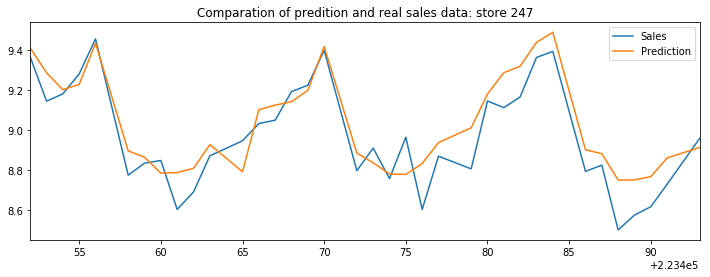

In [19]:
sample = pd.DataFrame(data = X_ytest_md)
sample['Prediction']=yhat
sample = pd.merge(X_xtest_md,sample, left_index= True, right_index=True)

s = pd.DataFrame(sample[sample['Store']==247],columns = ['Sales','Prediction'])
s.plot(title = 'Comparation of predition and real sales data: store {}'.format(247),figsize=(12,4))

**修改4：对结果乘以一个系数修正数据分布**

In [33]:
sample['Ratio'] = sample.Prediction/sample.Sales

col_1 = ['Sales','Prediction']
col_2 = ['Ratio']
store_num=np.random.randint( low=1,high = 1115, size = 3 ) 
print('Mean Ratio of predition and real sales data is {}: store all'.format(sample.Ratio.mean()))
for i in store_num:
    s2 = pd.DataFrame(sample[sample['Store']==i],columns = col_2)
    print('Mean Ratio of predition and real sales data is {}: store {}'.format(s2.Ratio.mean(),i))

Mean Ratio of predition and real sales data is 1.001975630868507: store all
Mean Ratio of predition and real sales data is 1.0020095927669035: store 647
Mean Ratio of predition and real sales data is 1.025711970722031: store 550
Mean Ratio of predition and real sales data is 1.0020305968922627: store 531


Best weight for Score:0.996    0.123084
dtype: float64


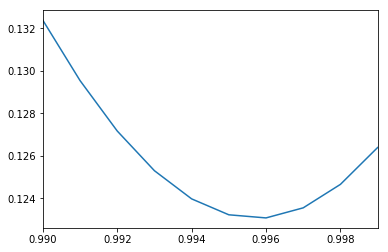

In [34]:
W=[(0.990+(i/1000)) for i in range(10)]
S =[]
for weight in W:
    error = rmspe(np.expm1(X_ytest_md), np.expm1(yhat*weight))
    S.append(error)
Score = pd.Series(S,index=W)
Score.plot()
best_S = Score[Score.values == Score.values.min()]
print ('Best weight for Score:{}'.format(best_S))

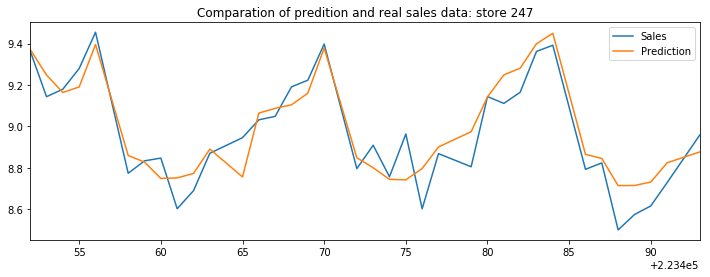

In [29]:
sample2 = pd.DataFrame(data = X_ytest_md)
sample2['Prediction']=yhat*0.996
sample2 = pd.merge(X_xtest_md,sample2, left_index= True, right_index=True)

s1 = pd.DataFrame(sample2[sample2['Store']==247],columns = ['Sales','Prediction'])
s1.plot(title = 'Comparation of predition and real sales data: store {}'.format(247),figsize=(12,4))

In [21]:
xgb_model_final_md.save_model('last_model.model')

In [22]:
unseen = xgb.DMatrix(test_store_datax_md)

In [35]:
test_predict = xgb_model_final_md.predict(unseen)

forecasts_md = pd.DataFrame({'Id': test_store_data_md['Id'], 
                          'Sales': np.expm1(test_predict*0.996)})
forecasts_md.head()

,Id,Sales
0,1,3896.915039
1,857,4082.149170
2,1713,4324.837891
3,2569,4885.968750
4,3425,5662.692871


In [36]:
forecasts_md.to_csv('forecasts_xgb0996.csv',index = False)